
# Project: Investigate a Soccer Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I selected the Soccer Database for Analysis. It contains data for soccer matches, players from eleven European countries from 2008 to 2016. This Database includes six tables with a lot of data.


In [1]:
# import statements for all of the packages that I will use

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import date
%matplotlib inline


> I will try to find out:
<li> the average and total number of goals scored in five European league (Spanish, Italian, German, English and Polish (because I am from Poland) in each season
<li> which league has the largest number of scored goals, what about Poland?
<li> average goals FC Barcelona scored and lost in home and away games in each season ( I am huge fan of FC Barcelona) 
<li> does the player's height, age and preferred foot affect their potencial

<a id='wrangling'></a>
## Data Wrangling


### General Properties

>Load my data and print out a few lines. Perform operations to inspect data types.

> First I have to create the connection to the SQLite database and find out what tables it contain

In [2]:
connection = sqlite3.connect('database.sqlite')

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", connection)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


>Read SQL tables into data frames

In [3]:
player_attributes = pd.read_sql_query("""SELECT *
                                      FROM Player_Attributes;""", connection)
player = pd.read_sql_query("""SELECT *
                            FROM Player;""", connection)
match = pd.read_sql_query("""SELECT *
                            FROM Match;""", connection)
league = pd.read_sql_query("""SELECT *
                            FROM League;""", connection)
country = pd.read_sql_query("""SELECT *
                            FROM Country;""", connection)
team = pd.read_sql_query("""SELECT *
                            FROM Team;""", connection)
team_attributes = pd.read_sql_query("""SELECT *
                                        FROM Team_Attributes;""", connection)

> Find out what kind of data are in each table

In [4]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [6]:
player_attributes.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [7]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [8]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [9]:
player.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [10]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [11]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [12]:
match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [13]:
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [14]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [15]:
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [16]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [17]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [18]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [19]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [20]:
team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [21]:
team_attributes.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000



### Preparations of relevant data

>There is a lot of unnecessary data. To answer my questions I will create few new dataframes using SQL JOIN function which contain the right data.

>First dataframe: leagues, to get information about the average home and away goals and total number of goals scored in Spain, Italy, Germany, England and Poland each season. I will use Match, Country, League and Team tables.

In [72]:
leagues = pd.read_sql("""SELECT c.name AS country_name, 
                                        l.name AS league_name, 
                                        m.season,
                                        count(distinct m.stage) AS number_of_stages,
                                        count(distinct t1.team_long_name) AS number_of_teams,
                                        avg(m.home_team_goal) AS avg_home_team_scors, 
                                        avg(m.away_team_goal) AS avg_away_team_goals,  
                                        avg(m.home_team_goal+m.away_team_goal) AS avg_goals, 
                                        sum(m.home_team_goal+m.away_team_goal) AS total_goals                                       
                                    FROM Match m
                                    JOIN Country c
                                    ON c.id = m.country_id
                                    JOIN League l
                                    ON l.id = m.league_id
                                    LEFT JOIN Team t1
                                    ON t1.team_api_id = m.home_team_api_id
                                    LEFT JOIN Team t2
                                    ON t2.team_api_id = m.away_team_api_id
                                    WHERE country_name in ('Spain', 'Italy', 'England', 'Germany', 'Poland')
                                    GROUP BY c.name, l.name, m.season
                                    ORDER BY c.name, l.name, m.season
                                    ;""", connection)
leagues.head()

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goals,total_goals
0,England,England Premier League,2008/2009,38,20,1.400000,1.078947,2.478947,942
1,England,England Premier League,2009/2010,38,20,1.697368,1.073684,2.771053,1053
2,England,England Premier League,2010/2011,38,20,1.623684,1.173684,2.797368,1063
3,England,England Premier League,2011/2012,38,20,1.589474,1.215789,2.805263,1066
4,England,England Premier League,2012/2013,38,20,1.557895,1.239474,2.797368,1063


>looking for missing or possibly errant data

In [73]:
leagues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
country_name           40 non-null object
league_name            40 non-null object
season                 40 non-null object
number_of_stages       40 non-null int64
number_of_teams        40 non-null int64
avg_home_team_scors    40 non-null float64
avg_away_team_goals    40 non-null float64
avg_goals              40 non-null float64
total_goals            40 non-null int64
dtypes: float64(3), int64(3), object(3)
memory usage: 2.9+ KB


In [74]:
leagues.describe()

,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goals,total_goals
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,35.600000,18.725000,1.540913,1.143248,2.684161,907.650000
std,3.240766,1.768492,0.117602,0.111169,0.201732,178.568603
min,30.000000,15.000000,1.241667,0.845833,2.183333,524.000000
25%,34.000000,18.000000,1.494079,1.083553,2.595950,866.000000
50%,38.000000,20.000000,1.546053,1.135526,2.718421,977.000000
75%,38.000000,20.000000,1.625658,1.209868,2.799342,1042.250000
max,38.000000,20.000000,1.748366,1.411765,3.160131,1101.000000


>Create matches_Spain dataframe with important informations (columns) about Spanish League to get the number of goals scored by FC Barcelona. I will use Match, Country, League and Team tables.

In [25]:
matches_Spain = pd.read_sql("""SELECT m.id, c.name AS country_name, l.name AS league_name,
                                    m.season, m.stage, t1.team_long_name AS home_team, 
                                    t2.team_long_name AS away_team, 
                                    m.home_team_goal, m.away_team_goal
                                FROM Match m
                                JOIN Country c
                                ON m.country_id = c.id
                                JOIN League l
                                ON c.id = l.country_id
                                JOIN Team t1
                                ON m.home_team_api_id = t1.team_api_id
                                JOIN Team t2
                                ON t2.team_api_id = m.away_team_api_id
                                WHERE country_name = 'Spain'
                                ;""", connection)
matches_Spain.head()

,id,country_name,league_name,season,stage,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,Valencia CF,RCD Mallorca,3,0
1,21519,Spain,Spain LIGA BBVA,2008/2009,1,CA Osasuna,Villarreal CF,1,1
2,21520,Spain,Spain LIGA BBVA,2008/2009,1,RC Deportivo de La Coruña,Real Madrid CF,2,1
3,21521,Spain,Spain LIGA BBVA,2008/2009,1,CD Numancia,FC Barcelona,1,0
4,21522,Spain,Spain LIGA BBVA,2008/2009,1,Racing Santander,Sevilla FC,1,1


>looking for missing or possibly errant data

In [26]:
matches_Spain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 9 columns):
id                3040 non-null int64
country_name      3040 non-null object
league_name       3040 non-null object
season            3040 non-null object
stage             3040 non-null int64
home_team         3040 non-null object
away_team         3040 non-null object
home_team_goal    3040 non-null int64
away_team_goal    3040 non-null int64
dtypes: int64(4), object(5)
memory usage: 213.8+ KB


In [27]:
matches_Spain.describe()

,id,stage,home_team_goal,away_team_goal
count,3040.000000,3040.00000,3040.000000,3040.000000
mean,23037.500000,19.50000,1.631250,1.135855
std,877.716735,10.96766,1.388339,1.161079
min,21518.000000,1.00000,0.000000,0.000000
25%,22277.750000,10.00000,1.000000,0.000000
50%,23037.500000,19.50000,1.000000,1.000000
75%,23797.250000,29.00000,2.000000,2.000000
max,24557.000000,38.00000,10.000000,8.000000


>Create players_att dataframe to get informations about players and their attributes. I will use Players and Players_Attributes tables.

In [28]:
players_att = pd.read_sql("""SELECT p.player_name, p.height, p.weight, p.birthday, 
                                pa.date, pa.potential, pa.preferred_foot, pa.dribbling, 
                                pa.ball_control, pa.sprint_speed, pa.penalties, pa.attacking_work_rate,
                                pa.defensive_work_rate
                            FROM Player_Attributes pa
                            JOIN Player p
                            ON p.player_api_id = pa.player_api_id
                            ORDER BY p.player_name, pa.date
                            ;""", connection)
players_att.head()

,player_name,height,weight,birthday,date,potential,preferred_foot,dribbling,ball_control,sprint_speed,penalties,attacking_work_rate,defensive_work_rate
0,Aaron Appindangoye,182.88,187,1992-02-29 00:00:00,2007-02-22 00:00:00,65.0,right,50.0,48.0,64.0,47.0,medium,medium
1,Aaron Appindangoye,182.88,187,1992-02-29 00:00:00,2015-03-20 00:00:00,65.0,right,50.0,48.0,64.0,47.0,medium,medium
2,Aaron Appindangoye,182.88,187,1992-02-29 00:00:00,2015-09-21 00:00:00,66.0,right,51.0,49.0,64.0,48.0,medium,medium
3,Aaron Appindangoye,182.88,187,1992-02-29 00:00:00,2015-11-19 00:00:00,71.0,right,51.0,49.0,64.0,48.0,medium,medium
4,Aaron Appindangoye,182.88,187,1992-02-29 00:00:00,2016-02-18 00:00:00,71.0,right,51.0,49.0,64.0,48.0,medium,medium


>looking for missing or possibly errant data

In [29]:
players_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 13 columns):
player_name            183978 non-null object
height                 183978 non-null float64
weight                 183978 non-null int64
birthday               183978 non-null object
date                   183978 non-null object
potential              183142 non-null float64
preferred_foot         183142 non-null object
dribbling              183142 non-null float64
ball_control           183142 non-null float64
sprint_speed           183142 non-null float64
penalties              183142 non-null float64
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
dtypes: float64(6), int64(1), object(6)
memory usage: 18.2+ MB


In [30]:
players_att.describe()

,height,weight,potential,dribbling,ball_control,sprint_speed,penalties
count,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,181.878872,168.776245,73.460353,59.175154,63.388879,68.051244,55.003986
std,6.394818,15.088920,6.592271,17.744688,15.196671,12.569721,15.546519
min,157.480000,117.000000,39.000000,1.000000,5.000000,12.000000,2.000000
25%,177.800000,159.000000,69.000000,52.000000,58.000000,62.000000,45.000000
50%,182.880000,168.000000,74.000000,64.000000,67.000000,69.000000,57.000000
75%,185.420000,179.000000,78.000000,72.000000,73.000000,77.000000,67.000000
max,208.280000,243.000000,97.000000,97.000000,97.000000,97.000000,96.000000


>Convert birthday and date columns to datetime.

In [31]:
players_att['birthday'] = pd.to_datetime(players_att['birthday'])
players_att['date'] = pd.to_datetime(players_att['date'])
players_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 13 columns):
player_name            183978 non-null object
height                 183978 non-null float64
weight                 183978 non-null int64
birthday               183978 non-null datetime64[ns]
date                   183978 non-null datetime64[ns]
potential              183142 non-null float64
preferred_foot         183142 non-null object
dribbling              183142 non-null float64
ball_control           183142 non-null float64
sprint_speed           183142 non-null float64
penalties              183142 non-null float64
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
dtypes: datetime64[ns](2), float64(6), int64(1), object(4)
memory usage: 18.2+ MB


>Create new column with age of players

In [32]:
players_att['age'] = date.today().year - players_att['birthday'].dt.year
players_att.head()

,player_name,height,weight,birthday,date,potential,preferred_foot,dribbling,ball_control,sprint_speed,penalties,attacking_work_rate,defensive_work_rate,age
0,Aaron Appindangoye,182.88,187,1992-02-29,2007-02-22,65.0,right,50.0,48.0,64.0,47.0,medium,medium,26
1,Aaron Appindangoye,182.88,187,1992-02-29,2015-03-20,65.0,right,50.0,48.0,64.0,47.0,medium,medium,26
2,Aaron Appindangoye,182.88,187,1992-02-29,2015-09-21,66.0,right,51.0,49.0,64.0,48.0,medium,medium,26
3,Aaron Appindangoye,182.88,187,1992-02-29,2015-11-19,71.0,right,51.0,49.0,64.0,48.0,medium,medium,26
4,Aaron Appindangoye,182.88,187,1992-02-29,2016-02-18,71.0,right,51.0,49.0,64.0,48.0,medium,medium,26


In [33]:
players_att['player_name'].nunique()

10848

>For each player there is a few rows/data from diffrent date. So I decided to select data for the most recent date for each of 10848 players. Data are orderd by player_name and date so I use 'nth' function and take the last row (most recent date) for each player.

In [34]:
players_att = players_att.groupby('player_name', as_index=False).nth(-1)
players_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10848 entries, 4 to 183977
Data columns (total 14 columns):
player_name            10848 non-null object
height                 10848 non-null float64
weight                 10848 non-null int64
birthday               10848 non-null datetime64[ns]
date                   10848 non-null datetime64[ns]
potential              10844 non-null float64
preferred_foot         10844 non-null object
dribbling              10844 non-null float64
ball_control           10844 non-null float64
sprint_speed           10844 non-null float64
penalties              10844 non-null float64
attacking_work_rate    10325 non-null object
defensive_work_rate    10844 non-null object
age                    10848 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 1.2+ MB


In [35]:
players_att.describe()

,height,weight,potential,dribbling,ball_control,sprint_speed,penalties,age
count,10848.000000,10848.000000,10844.000000,10844.000000,10844.000000,10844.000000,10844.000000,10848.000000
mean,181.861940,168.356379,71.031354,57.800627,62.156953,65.184434,53.474733,31.317109
std,6.364666,14.990954,6.230052,17.678127,15.232445,13.731081,15.837265,5.484434
min,157.480000,117.000000,49.000000,6.000000,9.000000,12.000000,7.000000,19.000000
25%,177.800000,159.000000,67.000000,51.000000,58.000000,56.000000,44.000000,27.000000
50%,182.880000,168.000000,71.000000,62.000000,65.000000,67.000000,55.000000,31.000000
75%,185.420000,179.000000,75.000000,70.000000,72.000000,75.000000,65.000000,35.000000
max,208.280000,243.000000,94.000000,96.000000,96.000000,96.000000,96.000000,51.000000


In [36]:
players_att['date'].min()  

Timestamp('2007-08-30 00:00:00')

>To make sure there are still active players I only choose the data from 2016

In [37]:
players_att_2016 = players_att[players_att['date'].dt.year==2016]
players_att_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5538 entries, 4 to 183910
Data columns (total 14 columns):
player_name            5538 non-null object
height                 5538 non-null float64
weight                 5538 non-null int64
birthday               5538 non-null datetime64[ns]
date                   5538 non-null datetime64[ns]
potential              5536 non-null float64
preferred_foot         5536 non-null object
dribbling              5536 non-null float64
ball_control           5536 non-null float64
sprint_speed           5536 non-null float64
penalties              5536 non-null float64
attacking_work_rate    5536 non-null object
defensive_work_rate    5536 non-null object
age                    5538 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 649.0+ KB


>There are two missing values. I drop them off

In [38]:
players_att_2016.dropna(inplace=True)
players_att_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5536 entries, 4 to 183910
Data columns (total 14 columns):
player_name            5536 non-null object
height                 5536 non-null float64
weight                 5536 non-null int64
birthday               5536 non-null datetime64[ns]
date                   5536 non-null datetime64[ns]
potential              5536 non-null float64
preferred_foot         5536 non-null object
dribbling              5536 non-null float64
ball_control           5536 non-null float64
sprint_speed           5536 non-null float64
penalties              5536 non-null float64
attacking_work_rate    5536 non-null object
defensive_work_rate    5536 non-null object
age                    5536 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 648.8+ KB


C:\Users\Jozef-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<a id='eda'></a>
## Exploratory Data Analysis


### The average and total number of goals scored in five European league (Spanish, Italian, German, English and Polish) in each season. Which league has the largest number of scored goals? What about Poland?

>I will use leagues dataframe.

In [75]:
leagues.describe()

,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goals,total_goals
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,35.600000,18.725000,1.540913,1.143248,2.684161,907.650000
std,3.240766,1.768492,0.117602,0.111169,0.201732,178.568603
min,30.000000,15.000000,1.241667,0.845833,2.183333,524.000000
25%,34.000000,18.000000,1.494079,1.083553,2.595950,866.000000
50%,38.000000,20.000000,1.546053,1.135526,2.718421,977.000000
75%,38.000000,20.000000,1.625658,1.209868,2.799342,1042.250000
max,38.000000,20.000000,1.748366,1.411765,3.160131,1101.000000


>From above statistics the average goals scored in top European leagues is 2.68 per match and the mean total goals scored is 907.65 in one season.

In [76]:
league_goals = leagues.groupby('league_name')['avg_goals', 'total_goals'].mean()
league_goals.idxmax()

avg_goals      Germany 1. Bundesliga
total_goals          Spain LIGA BBVA
dtype: object

>The largest number of total goals is scored in the Spanish league. The largest average number of goals per match is scored in the German league.

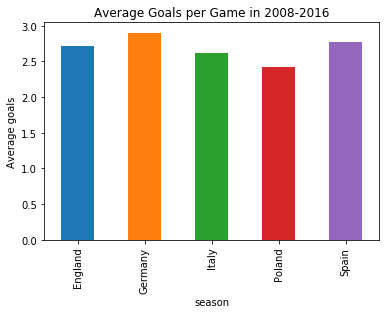

In [77]:
#bar plot average goals per game in 2008-2016
top_avg_c = leagues.groupby('country_name')['avg_goals'].mean()
top_avg_c.plot(kind='bar', title='Average Goals per Game in 2008-2016')
plt.xlabel('season')
plt.ylabel('Average goals');

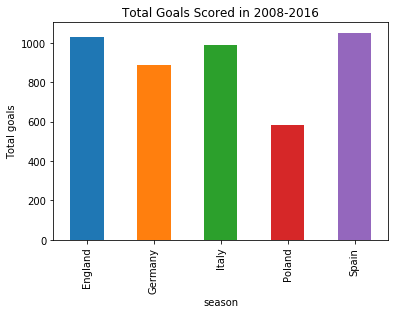

In [78]:
#bar plot showing total goals scored in 2008-2016
top_total_c = leagues.groupby('country_name')['total_goals'].mean()
top_total_c.plot(kind='bar', title='Total Goals Scored in 2008-2016')
plt.xlabel('season')
plt.ylabel('Total goals');

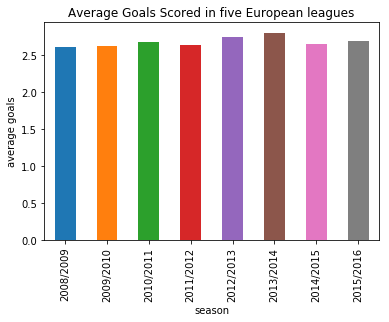

In [79]:
#bar plot showing average goals scored in each season in 5 European League
top_avg_s = leagues.groupby('season')['avg_goals'].mean()
top_avg_s.plot(kind='bar', title='Average Goals Scored in five European leagues')
plt.xlabel('season')
plt.ylabel('average goals');

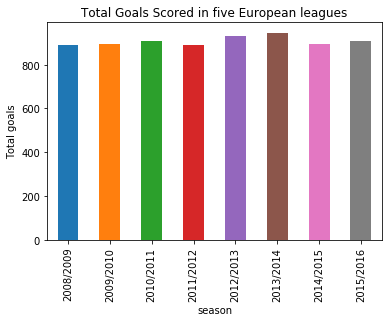

In [80]:
#bar plot showing total goals scored in each season in 5 European League
top_total_s = leagues.groupby('season')['total_goals'].mean()
top_total_s.plot(kind='bar', title='Total Goals Scored in five European leagues')
plt.xlabel('season')
plt.ylabel('Total goals');

>The largest average and total number of goals was scored in 2013/2014 season.

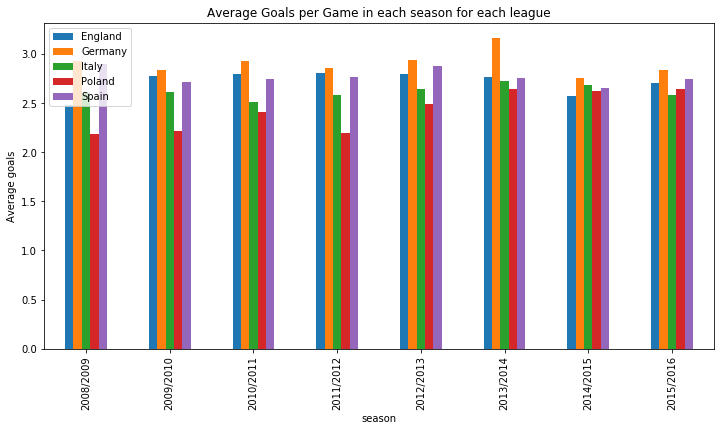

In [85]:
#bar plot showing average goals scored in each season in each of 5 European League
top = pd.DataFrame(index=np.sort(leagues['season'].unique()), columns=leagues['country_name'].unique())

top.loc[:,'Germany'] = list(leagues.loc[leagues['country_name']=='Germany','avg_goals'])
top.loc[:,'Spain']   = list(leagues.loc[leagues['country_name']=='Spain','avg_goals'])
top.loc[:,'Italy']   = list(leagues.loc[leagues['country_name']=='Italy','avg_goals'])
top.loc[:,'England']   = list(leagues.loc[leagues['country_name']=='England','avg_goals'])
top.loc[:,'Poland']   = list(leagues.loc[leagues['country_name']=='Poland','avg_goals'])

top.plot(kind='bar', figsize=(12,6),title='Average Goals per Game in each season for each league')
plt.xlabel('season')
plt.ylabel('Average goals');

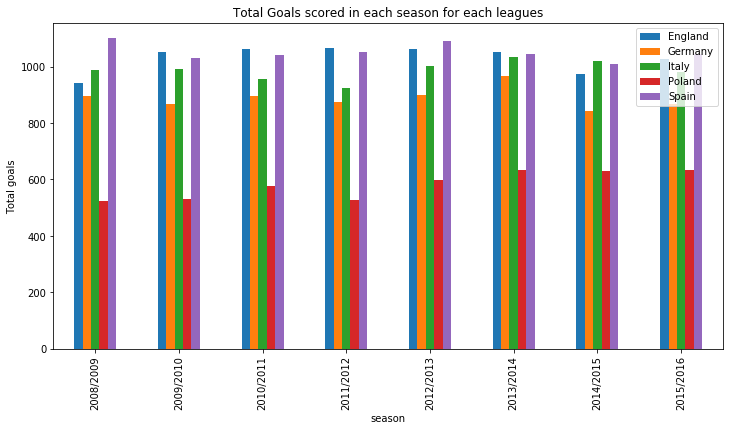

In [86]:
#bar plot showing total goals scored in each season in each of 5 European League
top = pd.DataFrame(index=np.sort(leagues['season'].unique()), columns=leagues['country_name'].unique())

top.loc[:,'Germany'] = list(leagues.loc[leagues['country_name']=='Germany','total_goals'])
top.loc[:,'Spain']   = list(leagues.loc[leagues['country_name']=='Spain','total_goals'])
top.loc[:,'Italy']   = list(leagues.loc[leagues['country_name']=='Italy','total_goals'])
top.loc[:,'England']   = list(leagues.loc[leagues['country_name']=='England','total_goals'])
top.loc[:,'Poland']   = list(leagues.loc[leagues['country_name']=='Poland','total_goals'])

top.plot(kind='bar', figsize=(12,6),title='Total Goals scored in each season for each leagues')
plt.xlabel('season')
plt.ylabel('Total goals');

>Tha largest number of total goals has Spanish league in 2008/2009 season. In each season the least number of scored goals was in Poland. In last two season (2014/2015, 2015/2016) Polish league has not smallest average goals scored per game (better than English - 2014/2015 and Italian - 2015/2016.

### Average goals FC Barcelona scored and lost in home and away games in each season 

>I will use matches_Spain dataframe.

In [47]:
matches_Spain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 9 columns):
id                3040 non-null int64
country_name      3040 non-null object
league_name       3040 non-null object
season            3040 non-null object
stage             3040 non-null int64
home_team         3040 non-null object
away_team         3040 non-null object
home_team_goal    3040 non-null int64
away_team_goal    3040 non-null int64
dtypes: int64(4), object(5)
memory usage: 213.8+ KB


In [48]:
#Create dataframes for FCB home and away games
fcb_home = matches_Spain[matches_Spain['home_team'] == 'FC Barcelona']
fcb_away = matches_Spain[matches_Spain['away_team'] == 'FC Barcelona']

#Mean goals scored by FCB at home (fcb_home_mean) and away (fcb_away_mean) in each season
fcb_home_mean = fcb_home.groupby('season')['home_team_goal'].mean()
fcb_away_mean = fcb_away.groupby('season')['away_team_goal'].mean()

In [49]:
#average scored goal in home games in each season
fcb_home_mean

season
2008/2009    3.210526
2009/2010    3.000000
2010/2011    2.421053
2011/2012    3.842105
2012/2013    3.315789
2013/2014    3.368421
2014/2015    3.368421
2015/2016    3.526316
Name: home_team_goal, dtype: float64

In [50]:
#average scored goal in away game in each season
fcb_away_mean

season
2008/2009    2.315789
2009/2010    2.157895
2010/2011    2.578947
2011/2012    2.157895
2012/2013    2.736842
2013/2014    1.894737
2014/2015    2.421053
2015/2016    2.368421
Name: away_team_goal, dtype: float64

In [51]:
#average scored goal in home game in 2008-2016
fcb_home_mean.mean()

3.256578947368421

In [52]:
#average scored goal in away game in 2008-2016
fcb_away_mean.mean()

2.3289473684210527

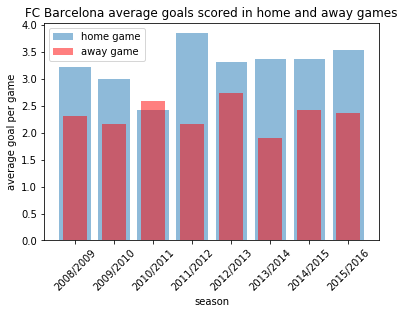

In [53]:
#bar plot showing average goals scored in home and away games
plt.bar(fcb_home['season'].unique(), fcb_home_mean, label = 'home game', alpha=0.5) 
plt.bar(fcb_away['season'].unique(), fcb_away_mean, width=0.6, color='r', label = 'away game', alpha=0.5)
plt.title('FC Barcelona average goals scored in home and away games')
plt.xticks(fcb_home['season'].unique(), rotation=45)
plt.xlabel('season')
plt.ylabel('average goal per game')
plt.legend(loc=2)
plt.show()

>FC Barcelona scores more goals per game at home game. Only in one season FCB has the largest average goals scored in away game (2010/2011). They score 3.26 goals per home match and 2.33 per away match.  

In [54]:
#Mean goals lost by FCB at home (fcb_h_lost_mean) and away (fcb_a_lost_mean) in each season
fcb_h_lost_mean = fcb_home.groupby('season')['away_team_goal'].mean()
fcb_a_lost_mean = fcb_away.groupby('season')['home_team_goal'].mean()

In [55]:
#average lost goal in home game in each season
fcb_h_lost_mean

season
2008/2009    0.736842
2009/2010    0.578947
2010/2011    0.526316
2011/2012    0.578947
2012/2013    0.789474
2013/2014    0.789474
2014/2015    0.578947
2015/2016    0.736842
Name: away_team_goal, dtype: float64

In [56]:
#average lost goal in away game in each season
fcb_a_lost_mean

season
2008/2009    1.105263
2009/2010    0.684211
2010/2011    0.578947
2011/2012    0.947368
2012/2013    1.315789
2013/2014    0.947368
2014/2015    0.526316
2015/2016    0.789474
Name: home_team_goal, dtype: float64

In [57]:
#average lost goal in home game in 2008-2016
fcb_h_lost_mean.mean()

0.6644736842105263

In [58]:
#average lost goal in away game in 2008-2016
fcb_a_lost_mean.mean()

0.861842105263158

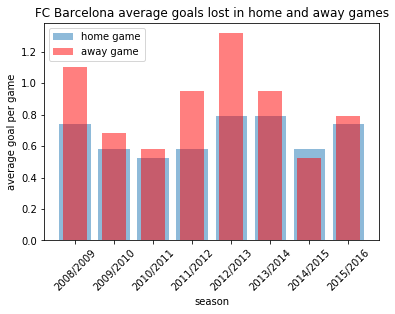

In [59]:
#bar plot showing average goals lost in home and away games
plt.bar(fcb_home['season'].unique(), fcb_h_lost_mean, label = 'home game', alpha=0.5) 
plt.bar(fcb_away['season'].unique(), fcb_a_lost_mean, width=0.6, color='r', label = 'away game', alpha=0.5)
plt.title('FC Barcelona average goals lost in home and away games')
plt.xticks(fcb_home['season'].unique(), rotation=45)
plt.xlabel('season')
plt.ylabel('average goal per game')
plt.legend(loc=2)
plt.show()

>FC Barcelona lost more goals per game at away games. Only in one season FCB has the largest average goals lost in home game (2014/2015). They lost 0.66 goals per home match and 0.86 per away match.

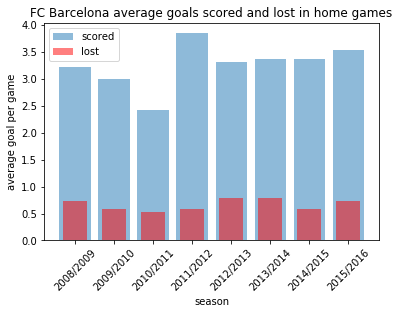

In [60]:
#bar plot showing average goals scored and lost in home games
plt.bar(fcb_home['season'].unique(), fcb_home_mean, label = 'scored', alpha=0.5) 
plt.bar(fcb_home['season'].unique(), fcb_h_lost_mean, width=0.6, color='r', label = 'lost', alpha=0.5)
plt.title('FC Barcelona average goals scored and lost in home games')
plt.xticks(fcb_home['season'].unique(), rotation=45)
plt.xlabel('season')
plt.ylabel('average goal per game')
plt.legend(loc=2)
plt.show()

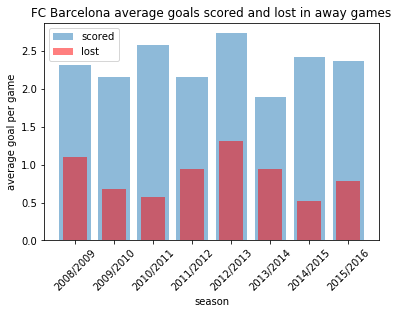

In [61]:
#bar plot showing average goals scored and lost in away games
plt.bar(fcb_home['season'].unique(), fcb_away_mean, label = 'scored', alpha=0.5) 
plt.bar(fcb_home['season'].unique(), fcb_a_lost_mean, width=0.6, color='r', label = 'lost', alpha=0.5)
plt.title('FC Barcelona average goals scored and lost in away games')
plt.xticks(fcb_home['season'].unique(), rotation=45)
plt.xlabel('season')
plt.ylabel('average goal per game')
plt.legend(loc=2)
plt.show()

>FCB scored much more goals then lost in each season.

### Does the preferred foot, age and growth of footballers affect their potential?

>I will use players_att_2016 dataframe.

In [62]:
players_att_2016.head()

,player_name,height,weight,birthday,date,potential,preferred_foot,dribbling,ball_control,sprint_speed,penalties,attacking_work_rate,defensive_work_rate,age
4,Aaron Appindangoye,182.88,187,1992-02-29,2016-02-18,71.0,right,51.0,49.0,64.0,48.0,medium,medium,26
37,Aaron Cresswell,170.18,146,1989-12-15,2016-04-21,76.0,left,73.0,71.0,78.0,59.0,high,medium,29
63,Aaron Doran,170.18,163,1991-05-13,2016-01-07,67.0,right,66.0,67.0,74.0,61.0,medium,medium,27
86,Aaron Galindo,182.88,198,1982-05-08,2016-04-21,69.0,right,56.0,62.0,34.0,37.0,medium,medium,36
138,Aaron Hunt,182.88,161,1986-09-04,2016-04-28,77.0,left,78.0,79.0,69.0,81.0,medium,medium,32


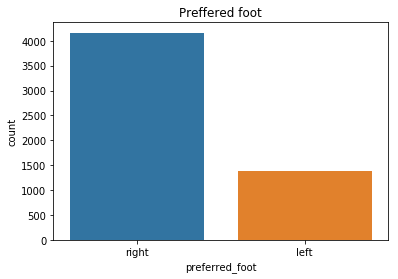

In [63]:
#countplot showing counts of preferred foot
sn.countplot(players_att_2016['preferred_foot']).set_title('Preffered foot');

>Much more players preferred the right foot to play.

In [64]:
players_att_2016.groupby('preferred_foot').mean()

,height,weight,potential,dribbling,ball_control,sprint_speed,penalties,age
preferred_foot,,,,,,,,
left,181.041964,166.013091,73.002909,63.399273,66.298182,69.457455,54.660364,29.078545
right,182.106585,168.390531,73.027157,59.906273,64.097813,67.084595,54.168709,29.180966


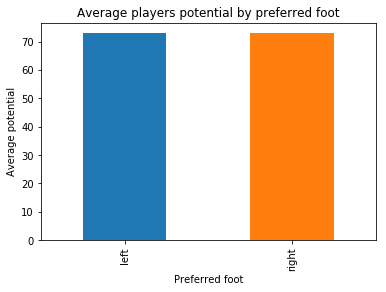

In [65]:
#bar plot showing potential by preferred foot
potential_mean = players_att_2016.groupby('preferred_foot')['potential'].mean()
potential_mean.plot(kind='bar', title='Average players potential by preferred foot')
plt.xlabel('Preferred foot')
plt.ylabel('Average potential');

>Preferred foot does not affect on potencial.

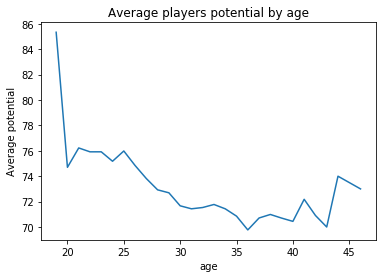

In [66]:
#line plot showing potential by age
potential_age = players_att_2016.groupby('age')['potential'].mean()
potential_age.plot(kind='line', title='Average players potential by age')
plt.xlabel('age')
plt.ylabel('Average potential');

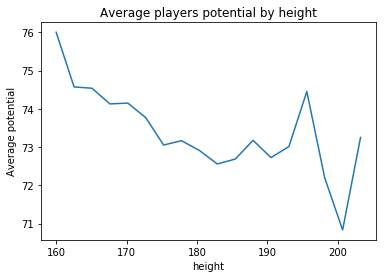

In [67]:
#line plot showing potential by height
potential_height = players_att_2016.groupby('height')['potential'].mean()
potential_height.plot(kind='line', title='Average players potential by height')
plt.xlabel('height')
plt.ylabel('Average potential');

>Do younger players have better potential?

In [68]:
# Use query to select each group and get its mean potential
median = players_att_2016['age'].median()
young = players_att_2016.query('age < {}'.format(median))
old = players_att_2016.query('age >= {}'.format(median))

mean_pot_young = young['potential'].mean()
mean_pot_old = old['potential'].mean()

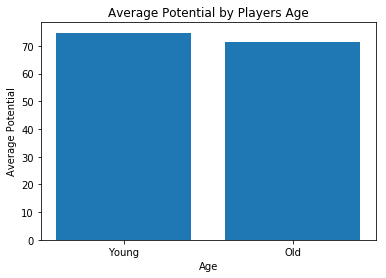

In [69]:
#bar plot showing potential by age
locations = [1, 2]
heights = [mean_pot_young, mean_pot_old]
labels = ['Young', 'Old']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Potential by Players Age')
plt.xlabel('Age')
plt.ylabel('Average Potential');

>Younger players have better potential.

>Do heigher players have better potential?

In [70]:
# Use query to select each group and get its mean potential
median = players_att_2016['height'].median()
small = players_att_2016.query('height < {}'.format(median))
tall = players_att_2016.query('height >= {}'.format(median))

mean_pot_young = young['potential'].mean()
mean_pot_old = old['potential'].mean()

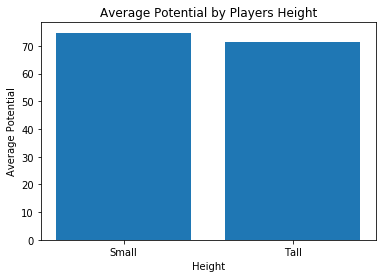

In [71]:
#bar plot showing potential by height
locations = [1, 2]
heights = [mean_pot_young, mean_pot_old]
labels = ['Small', 'Tall']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Potential by Players Height')
plt.xlabel('Height')
plt.ylabel('Average Potential');

>Smaller playeras have better potential.

> Does age affect on attacking work rate?

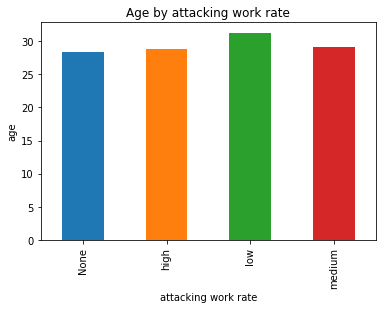

In [87]:
#bar plot showing average age by attacking work rate
players_att_2016.groupby('attacking_work_rate')['age'].mean().plot(kind='bar')
plt.xlabel('attacking work rate')
plt.ylabel('age')
plt.title('Age by attacking work rate');

> The oldest players have the low attacking work rate.

>Does height affect on attacking work rate?

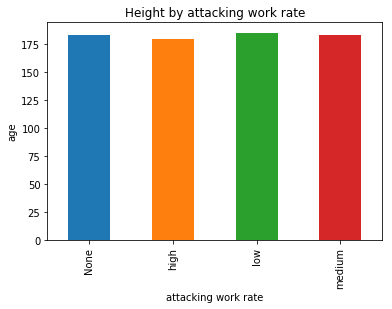

In [88]:
#bar plot showing average height by attacking work rate
players_att_2016.groupby('attacking_work_rate')['height'].mean().plot(kind='bar')
plt.xlabel('attacking work rate')
plt.ylabel('age')
plt.title('Height by attacking work rate');

>Players with high attacking work rate are the smallest.

<a id='conclusions'></a>
## Conclusions


This dataset is huge. It is possible to get a lot of diffrent informations about the players, leagues, teams and matches.

In European leagues the average scored goals are 2.68 per match. The largest number of scored goals is in Spain. The least goals are shot in Poland. It may be caused by smaller number of teams and matches.

FC Barcelona scores more goals in home games but lost more in away games. They scored much more goals then lost in both home and away games.

Much more players prefer right foot than left. The foot does not affect on potential. Younger players as well as smaller have a little bit higher potential. The oldest players have the low attacking work rate. Players with high attacking work rate are the smallest.


### Project limitations
<li> Soccer Dataset contains huge amount of data – 6 tables, one of them has 115 columns. It tooks a lot of time to analyse them and find proper data to answer my questions. Because of the amount of data processed by each query it takes plenty of computation power to get result. 

<li> The players_att dataframe contains two date columns in object type. To properly analyse them and find players age I had to change them to datetime type. Thera were 183978 rows with about 800 rows with missing data. Data was given several times for each player from a different date (few rows for each player). I decided to select data for the most recent date for each of 10848 players to get reliable analysis. I tried to use groupby().max() function, but there was a problem. This operation selected the most recent data but also removes the string columns. I found on github that after upgrading pandas from 0.7.2 to 0.9.1 the issue was introduced and  groupby().max() removes non-numeric columns. I had to find another way to get the data with most recent date. Because my data was ordered ascending by player_name and date columns (the ORDER BY in SQL query) I decided to use groupby(player_name).nth(-1) function and get the last row (with most recent data) for each player. New dataframe had some missing value too. The data was not from only one year (one was from 2007, another from 2016). To get reliable analysis I choose data only from 2016. New dataframe (players_att_2016) has 5538 rows and 14 columns. In 8 columns there were two rows with missing data. It is just a little compered to all rows in dataframe, so I decided to drop them off. Now the data has proper type and no missing values.

<li> The matches_Spain dataframe contains information about every game in Spanish league I was only interested in FC Barcelona games. I had to create two new dataframes contain information about home (fcb_home) and away (fcb_away) games only. There were no missing values.

<li>The leagues dataframe has no limitations. There was no missing values or incorrect data type.


> Used Web sites:
<li> https://www.kaggle.com/hugomathien/soccer/data
<li> https://www.kaggle.com/dimarudov/data-analysis-using-sql/notebook
<li> https://matplotlib.org
<li> http://pandas.pydata.org/pandas-docs/stable/